# Performing text analysis on recipe ingredients + cuisines

**Topics:** Text analysis, classifiers

**Datasets**

- **recipes.csv** Once upon a time I scraped a bunch of recipes, not sure where they're from.

## Imports

We're going to be using

* Pandas
* Regular expressions
* Decision Trees
* Random Forests
* Logistic Regression
* Confusion matrices
* CountVectorizer
* TfidfVectorizer

Import everything you need for those. It's easier than doing them one-by-one later, I think! We're also going to be doing the graphviz tree visualization, but I always just cut and paste that entire block as a unit.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
# from nltk.stem.porter import PorterStemmer
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## Read in our data

There's nothing too complicated about it.

In [2]:
df = pd.read_csv("recipes.csv")

# Vectorizing the ingredient list

These words aren't going to do us much good unless we can convert them to text. Use the `CountVectorizer` to count the number of times each word appears in each sentence.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

X = count_vectorizer.fit_transform(df.ingredient_list)

In [4]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
X.toarray()
words_df = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

Your result should be a dataframe named `words_df` that looks like a much wider version of this:
    
|00|10|...|zucchini|épices|
|---|---|---|---|---|
|0|0|...|0|0|
|0|0|...|0|0|
|0|0|...|0|0|
|0|0|...|0|0|
|0|0|...|0|0|

## Counting

### Count up how many times each word is used

Don't think too hard about this, there's nothing fancy about how you do this.

* **Tip:** Just imagine it's a normal dataframe and you want to add up each column.
* **Tip:** ...or imagine you're trying to add up _one_ column but you forget the column name.

In [6]:
words_df.sum().sort_values(ascending=False)

pepper              25742
salt                24462
oil                 23344
garlic              18941
ground              18271
fresh               17853
sauce               13129
sugar               12493
onions              12341
cheese              11776
chicken             11471
olive               10920
black               10753
water                9790
red                  9189
flour                8851
butter               8648
tomatoes             8599
green                8531
powder               8290
chopped              7884
cloves               7557
juice                7146
white                6915
onion                6901
eggs                 6502
cream                6096
rice                 6073
cilantro             5950
milk                 5872
                    ...  
parslei                 1
passover                1
chopmeat                1
chong                   1
pat                     1
chocolatecovered        1
patties                 1
osetra      

### What are the top 10 most common ingredients?

You'll want to use the results from the last question. Again, don't overthink it.

In [7]:
words_df.sum().sort_values(ascending=False).head(10)

pepper    25742
salt      24462
oil       23344
garlic    18941
ground    18271
fresh     17853
sauce     13129
sugar     12493
onions    12341
cheese    11776
dtype: int64

### Does anything seem wrong with those ingredients?

Do they all seem very ingredient-y to you?

In [8]:
# No

### Look at your original recipes dataframe again

What do the ingredients look like? How would you as a _person_ separate them compared to how the vectorizer did it?

In [9]:
df.head()

,cuisine,id,ingredient_list
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,22213,"water, vegetable oil, wheat, salt"
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep..."


# Using a custom tokenizer

Usually we can trust what the vectorizer does to the words, but this time we can't! Since we have a better idea about how to split it, we use a custom function to split each piece of text up.

To do this: copy and paste your code where you counted words up above. Add `tokenizer=split_on_commas` to `CountVectorizer` to tell it to use my custom function below.

In [10]:
def split_on_commas(text):
    # Split the list on commas, then remove any extra whitespace
    pieces = text.split(",")
    no_spaces = [piece.strip() for piece in pieces if piece]
    return no_spaces

count_vectorizer = CountVectorizer(tokenizer=split_on_commas)
X = count_vectorizer.fit_transform(df.ingredient_list)
# print(count_vectorizer.get_feature_names())  


Doesn't that look nicer??

_Yes!_

## Word counting, again

Get the top 15 most common ingredients. **It should be a much nicer list!**

In [11]:
X.toarray()
recipes_df = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

In [12]:
recipes_df.sum().sort_values(ascending=False).head(15)

salt                   18049
olive oil               7972
onions                  7972
water                   7457
garlic                  7380
sugar                   6434
garlic cloves           6237
butter                  4848
ground black pepper     4785
all-purpose flour       4632
pepper                  4438
vegetable oil           4385
eggs                    3388
soy sauce               3296
kosher salt             3113
dtype: int64

# Using our cuisines

## What are the most popular cuisines?

* **Tip:** You'll need to go back to your original dataframe for this.

In [13]:
df.head()

,cuisine,id,ingredient_list
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,22213,"water, vegetable oil, wheat, salt"
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep..."


In [14]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

## Find every recipe that uses soy sauce

In [15]:
df[df.ingredient_list.str.contains('soy sauce')]

,cuisine,id,ingredient_list
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
11,chinese,45887,"low sodium soy sauce, fresh ginger, dry mustar..."
19,vietnamese,8152,"soy sauce, vegetable oil, red bell pepper, chi..."
23,chinese,29630,"sesame seeds, red pepper, yellow peppers, wate..."
25,chinese,26705,"sugar, lo mein noodles, salt, chicken broth, l..."
28,chinese,9197,"green bell pepper, egg roll wrappers, sweet an..."
37,filipino,11300,"chicken broth, cooking oil, chinese five-spice..."
50,japanese,5767,"sirloin, mirin, yellow onion, low sodium soy s..."
61,thai,39267,"lemongrass, large garlic cloves, rice, unsweet..."
66,korean,8530,"jasmine rice, garlic, scallions, sugar, shiita..."


## What's are the top 5 cuisines that uses soy sauce?

In [16]:
df[df.ingredient_list.str.contains('soy sauce')].cuisine.value_counts().head(5)

chinese     2028
japanese     755
korean       531
thai         489
filipino     284
Name: cuisine, dtype: int64

Hm, soy sauce seems pretty common in Chinese food. **Maybe we could do something with that?**

# Building a Chinese food detector

Create a new column in your original dataframe called `is_chinese`. It should be `1` if the recipe is Chinese, `0` if the recipe is not.

In [17]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [18]:
df['is_chinese'] = np.where(df['cuisine'] == 'chinese', 1,0)

Confirm that you have 2,673 Chinese recipes and 37,101 non-Chinese recipes.

In [19]:
df['is_chinese'].value_counts()

0    37101
1     2673
Name: is_chinese, dtype: int64

## Building your features

To use a classifier, we need to build an `X` and a `y`.

* Your `X` is going to be the word counts for each recipe
* Your `y` is going to be whether each recipe Chinese or not

This is going to be a little different than what we normally do. Typically we use `.drop(column=` to remove our label, but this time we have **two separate dataframes** we're managing, so don't be surprised if you don't sue it.

In [20]:
X = recipes_df
y = df.is_chinese

Confirm that `X` is a dataframe of numbers (mostly zeroes) and `y` is a single column of `0`s and `1`s.

In [21]:
# Yes

NameError: name 'Yes' is not defined

### Split into test and train datasets

If we train our classifier on all of our recipes, it might cheat and memorize the answers (aka overfitting). Instead, we'll need to use `train_test_split` to separate into a training set it can study, and a test set we can use to see how well it performs. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Using our classifiers

## Decision Tree

**Create a decision tree classifier, and train it on our training data.** You can make a decision tree classifier like this:

```python
clf = DecisionTreeClassifier()
```

You'll want to also give it `max_depth=5` so we can visualize it without too much trouble later - otherwise it'll make many many decisions which will make a large complicated graphic.

Additionally, put `%%time` in the first row of the cell to see how long it takes to train our classifier.

In [23]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['not chinese', 'chinese'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted not chinese,Predicted chinese
Is not chinese,9189,65
Is chinese,379,311


### Print out our confusion matrix 

Use the one from our notes and homework, not the default scikit-learn version. The output should look something like this:

|.|Predicted not chinese|Predicted chinese|
|---|---|---|
|Is not chinese|9209|60|
|Is chinese|377|298|

**How do we feel about our classifier's performance?** Describe what is happening in the "is chinese" row using words.

In [ ]:
# It's bad at predicting if the food is chinese. 

### What are the important features?

You can use the following code to see feature importance for a decision tree.

```python
feature_names = X.columns
importances = clf.feature_importances_

pd.DataFrame({
    'feature': feature_names,
    'feature importance': importances,
}).sort_values(by='feature importance', ascending=False)
```

In [25]:
feature_names = X.columns
importances = clf.feature_importances_

pd.DataFrame({
    'feature': feature_names,
    'feature importance': importances,
}).sort_values(by='feature importance', ascending=False)

,feature,feature importance
5667,soy sauce,0.387746
3535,light soy sauce,0.151541
1552,corn starch,0.138989
3658,low sodium soy sauce,0.090315
5357,sesame oil,0.064800
1188,chinese five-spice powder,0.039284
2986,hoisin sauce,0.030596
5373,shaoxing wine,0.027015
4281,oyster sauce,0.018820
3978,mirin,0.014625


We gave it a lot of columns to pay attention to, so **why are so many of them zero?**

In [ ]:
# Idk 

### Visualize the decision tree

While those numbers are fun (if a little long), the _real fun_ is visualizing the tree itself. You can use this code to do that:

```python
from sklearn import tree
import graphviz

label_names = ['not chinese', 'chinese']
feature_names = X.columns

dot_data = tree.export_graphviz(clf,
                    feature_names=feature_names,  
                    filled=True,
                    class_names=label_names)  
graph = graphviz.Source(dot_data)  
graph
```

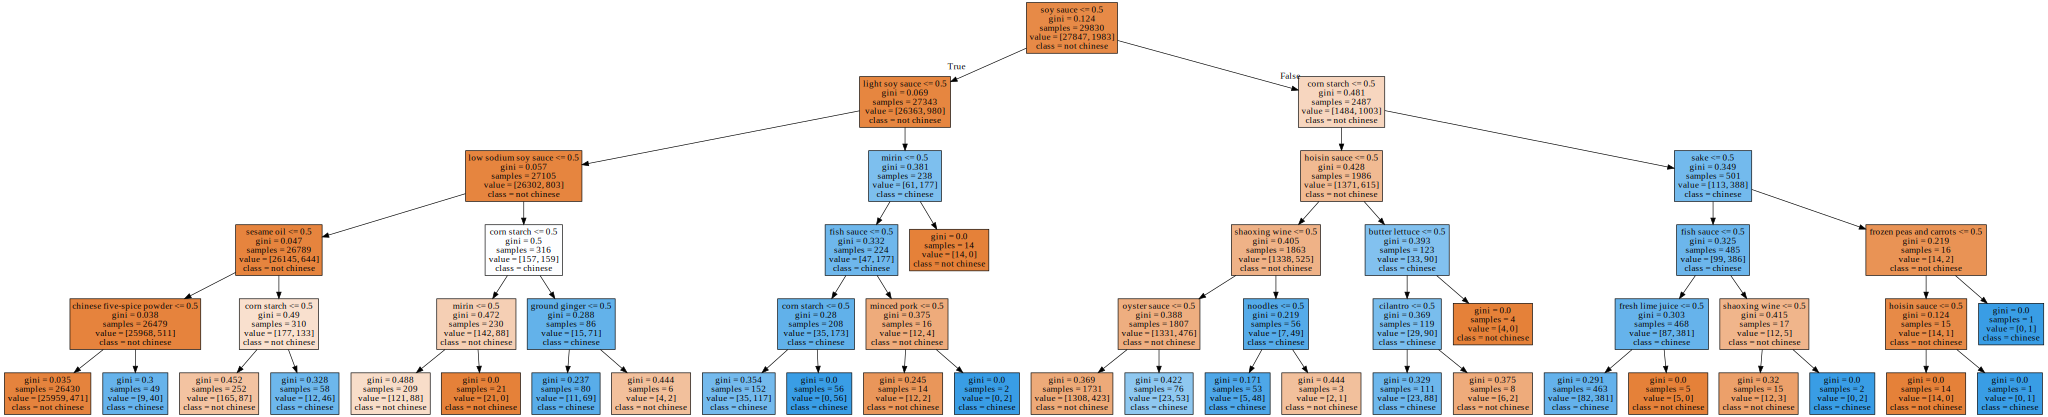

In [26]:
from sklearn import tree
import graphviz

label_names = ['not chinese', 'chinese']
feature_names = X.columns

dot_data = tree.export_graphviz(clf,
                    feature_names=feature_names,  
                    filled=True,
                    class_names=label_names)  
graph = graphviz.Source(dot_data)  

graph

**What do you think about that?** If you know about cooking or ingredients, do you recognize what some of those splits mean in terms of different cuisines?

## Random Forest

A random forest is like making a bunch of decision trees work together. **Create a random forest classifier, and train it on our data.**

```python
clf = RandomForestClassifier()
```

Right now, the `RandomForestClassifier` uses 10 decision trees to make its decision, with `n_estimators=10` being the default. You'll see a warning about how it's going to change to `100` in a future version.

You can try to use `100` now, but notice how long it takes! Use `%%time` to time how long it takes to train the random forest.

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### What are the feature importances?

You can re-use your decision tree code. Are the results any different?

In [28]:
feature_names = X.columns
importances = clf.feature_importances_

pd.DataFrame({
    'feature': feature_names,
    'feature importance': importances,
}).sort_values(by='feature importance', ascending=False)

,feature,feature importance
5667,soy sauce,0.077009
5357,sesame oil,0.061869
1188,chinese five-spice powder,0.041601
2986,hoisin sauce,0.033740
5063,rice vinegar,0.033355
1552,corn starch,0.031284
5373,shaoxing wine,0.028983
5064,rice wine,0.028415
2567,ginger,0.027077
5936,szechwan peppercorns,0.023106


### Why can't we draw a tree for a random forest?

In [ ]:
# There's too many

# Classifying with a logistic regression

To be a real data scientist, you throw every kind of classifier at your project until you find the one that works the best. Is that science? I don't know, really, but it's definitely reality.

## Building our classifier

This is the standard way to build a logistic regression classifier:

```python
clf = LogisticRegression(C=1e9, solver='lbfgs')
```

> You might get an error when fitting, though, that says "Increase the number of iterations." This means the regression failed to find a good answer, and you need to tell it to work harder. To do that, you need to set `max_iter=` to a higher number.
>
> The default is 100, and in previous homeworks we've cranked it up to 4000 with no problem. This time it isn't so easy - we have a lot lot lot lot of features this time, though, and every iteration makes the regression take more time until we get very very bored of things.
>
> You can solve this three ways:
>
> * Scroll up and add a `max_features=` to your vectorizer so it only picks a certain (lower) number of features, then re-run
> * Be very patient
> * Train on less data, by doing for example `clf.fit(X_train.head(7000), y_train.head(7000))`
> 
> I used `%%time` to see how long .fit would take with `max_iter=1000` - it ran for 5 minutes before it finished, but it never converged (aka got an answer)! My computer's old, but if you try that route you should go get a snack.

**Build a logistic classifier and train it on our training data**

In [29]:
clf = LogisticRegression(C=1e9, solver='lbfgs', max_iter=7000)
clf.fit(X_train.head(7000), y_train.head(7000))
clf

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=7000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Examining the coefficients

Use this code to print out the coefficients, it's slightly different than the decision tree version:

```python
import numpy as np

feature_names = X.columns
coefficients = clf.coef_[0]

pd.DataFrame({
    'feature': feature_names,
    'coefficient (log odds ratio)': coefficients,
    'odds ratio': np.exp(coefficients).round(4)
}).sort_values(by='odds ratio', ascending=False)
```

I might throw a `.head(20)` on there so you only see the top ones.

In [30]:
import numpy as np
feature_names = X.columns
coefficients = clf.coef_[0]

pd.DataFrame({
    'feature': feature_names,
    'coefficient (log odds ratio)': coefficients,
    'odds ratio': np.exp(coefficients).round(4)
}).sort_values(by='odds ratio', ascending=False).head(20)

,feature,coefficient (log odds ratio),odds ratio
1188,chinese five-spice powder,143.499598,2.094515e+62
1565,cornflour,83.049067,1.168831e+36
1209,chinese sausage,79.164324,2.402310e+34
5000,reduced sodium soy sauce,78.680742,1.481194e+34
6638,wonton wrappers,73.328523,7.017344e+31
5936,szechwan peppercorns,70.182834,3.020074e+30
3606,long-grain rice,68.132384,3.886140e+29
3599,long grain white rice,66.383391,6.759903e+28
751,brussels sprouts,63.759491,4.902247e+27
1972,dried shrimp,63.339224,3.220146e+27


These are pretty different from our decision tree.

**Why might these numbers be so different compared to our decision tree?** Think about how decision trees and logistic regression work. Or maybe go answer the next question and then come back.

**Use words to describe what the odds ratio for your top ingredient means.**

In [ ]:
# If a recipe has chinese five-spice powder, it is 1.4x more likely to be a chinese dish.

### Check the confusion matrix

How well does it do compared to the previous two classifiers?

In [31]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
label_names = pd.Series(['not chinese', 'chinese'])
pd.DataFrame(matrix,
    columns='Predicted ' + label_names,
    index='Is ' + label_names)


,Predicted not chinese,Predicted chinese
Is not chinese,9071,183
Is chinese,179,511


Describe in words how well it does at accurately predicting Chinese food recipes as being Chinese.

### Which was your best classifier so far?

Do you have to think about what "best" means, or is these a clear winner?

# Upgrading to a TF-IDF Vectorizer

Vectorizing using TF-IDF is almost always better than using simple counts. You can't find the most popular words or anything, but common words get downgraded and less common, more descriptive words end up rising in importance. And that seems cool!

Take your `CountVectorizer` code from up above and change it to use a `TfidfVectorizer`. I'll leave the `split_on_commas` code here as a start.

In [32]:
def split_on_commas(text):
    pieces = text.split(",")
    no_spaces = [piece.strip() for piece in pieces if piece]
    return no_spaces

tfidf_vectorizer = TfidfVectorizer(tokenizer=split_on_commas)
X = tfidf_vectorizer.fit_transform(df.ingredient_list)
words3 = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())


## Building our features

Create our `X` and `y` variables. Our `X` should be the adjusted word frequencies, and `y` should be whether the recipe is Chinese or not.

In [33]:
X = words3
y = df['is_chinese']

Once that's done, be sure to split your features and labels into test and train datasets.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Decision trees

**Create a decision tree and train it on our data.** Time how long it takes to complete training.

In [37]:
# %%time

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

CPU times: user 19.4 s, sys: 535 ms, total: 19.9 s
Wall time: 20.8 s


## What does it use to make its decisions?

You can either show me feature importances or the actual tree that's built (if you're using a low enough `max_features`).

In [38]:
label_names = ['not chinese', 'chinese']
feature_names = X.columns

dot_data = tree.export_graphviz(clf,
                    feature_names=feature_names,  
                    filled=True,
                    class_names=label_names) 

graph = graphviz.Source(dot_data)  
graph

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Compare this with what you got with the CountVectorizer. Do they seem that different?

In [ ]:
feature_names

### How well does this classifier do?

Confusion matrix, please.

In [39]:
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['not chinese', 'chinese'])
pd.DataFrame(matrix,
    columns='Predicted ' + label_names,
    index='Is ' + label_names)

,Predicted not chinese,Predicted chinese
Is not chinese,9246,9
Is chinese,531,158


Does it perform better than the `CountVectorizer` version?

# Logistic Regression classifier

I don't think we did that much better - if any better - with our new version. Let's try one more time using logistic regression.

If you get the "could not converge, increase iterations" error, refer to the tips up above about `max_iter` and `max_features`.

In [40]:
clf = LogisticRegression(C=1e9, solver='lbfgs', max_iter=7000)
clf.fit(X_train.head(7000), y_train.head(7000))
clf


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=7000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Questions

### Question 1: What is "vectorization?" Why do we do it?

### Question 2: What's the general difference between a `CountVectorizer` and a `TfidfVectorizer`?

### Question 3: Why did we end up using a custom tokenizer instead of the default scikit-learn one?

### Question 4: What's the best combination of vectorizer + classifier we've used? Does "best" depend on what's important to us?

### Question 5: How do you feel about trying out random classifiers until you find the "best" one?

### Question 6: What's the most "Chinese" ingredient? You might have a different answer based on what type of classifier you're using - why is that?


### Question 7: If you look at the top few words for the random forest, most of them are various types of soy sauce. How could you improve upon that when if you were spending more time with this dataset?

### Question 8: Scikit-learn vectorizers have a lot of options. Among those are `max_features`, which only takes the top n features, and `min_df`/`max_df`, which only allows words that show up above or below a certain percentage of the documents. For example, `max_df` of 0.75 removes any words that show up in more than 75% of documents. When might these options be useful?


### Question 9: If you had to explain a classifier to someone, would you rather explain a logistic regression or a decision tree? Why is that?

### Question 10: A random forest performs better than a decision tree, but it's easy to see how a decision tree works by looking at the flow chart. If you had to explain to your readers the algorithm behind your analysis, would you choose a better-performing algorithm or one that is easier to explain?

# Bonus!!!

## Multi-class problems

Did you know that `DecisionTreeClassifier` can actually support multiple classes, not just two? Probably not, since I've kept it a secret. If you're interested, let's try this out.

### Convert categories to numbers

First, convert the `cuisine` column into a category with `.astype('category')`

The cuisine looks like a string, but it's now secretly a number. You can use `.cat.codes` to get the code out. Assign that to a new column called `cuisine_code`

**Create a new `X` and `y`**. The `X` is the vectorized words, and the `y` is the cuisine code.

**Test train split!**

**Build a decision tree** and train it on the training data.

The confusion matrix code is a little different, but here you go:

```python
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(df.cuisine.cat.categories)
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)
```